In [1]:
import numpy as np
import cv2,os,sys
import matplotlib.pyplot as plt
from PIL import ImageTk,Image
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
import easygui # It allows us to select any file from our system, filebox
import imageio # to read images stored at particular path, or from file box

In [2]:
top = tk.Tk()
top.geometry('400x300')
top.title('Cartoon si sakal')
top.configure(background='black')
label = Label(top,background='black',font=('calibri',20,'bold'))

In [3]:
'''fileopenbox open the box to choose file from system and 
helps to store file path in string'''
def upload():
    ImagePath = easygui.fileopenbox()
    filters(ImagePath)

In [4]:
def filters(ImagePath):
    
    
    # read the image
    originalImg = cv2.imread(ImagePath)
    originalImg = cv2.cvtColor(originalImg,cv2.COLOR_BGR2RGB)
    
    # confirm the chosen Image 
    if originalImg is None:
        print('Can not find any image. Choose appropriate file')
        sys.exit()
        
    ResizedImg_1 = cv2.resize(originalImg,(950,550)) 
#     plt.imshow(ResizedImg_1)

    grayImg = cv2.cvtColor(originalImg,cv2.COLOR_BGR2GRAY)
    ResizedImg_2 = cv2.resize(grayImg,(950,550))
#     plt.imshow(ResizedImg_2,cmap='gray')

#     smooth = cv2.medianBlur(grayImg,7)
    getEdge = cv2.adaptiveThreshold(grayImg,250,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,7)
    ResizedImg_3 = cv2.resize(getEdge,(950,550))
#     plt.imshow(getEdge,cmap = 'gray')
    
    maskImg = cv2.bilateralFilter(originalImg,13,300,300)
    ResizedImg_4 = cv2.resize(maskImg,(950,550))
#     plt.imshow(ResizedImg_4)
    
    cartoon = cv2.bitwise_and(maskImg,maskImg,mask=getEdge)
    ResizedImg_5 = cv2.resize(cartoon,(950,550))
#     plt.imshow(ResizedImg_5)

    hulkImg = cv2.cvtColor(originalImg,cv2.COLOR_BGR2YUV)
    ResizedImg_6 = cv2.resize(hulkImg,(950,550))
#     plt.imshow(ResizedImg_6)
    
    images = [ResizedImg_1,ResizedImg_2,ResizedImg_3,ResizedImg_4,ResizedImg_5,ResizedImg_6]
    
    fig, axes = plt.subplots(3,2, figsize=(16,10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i],cmap='gray')
    
    save1=Button(top,text="Save cartoon image",command=lambda: save(ResizedImg_6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()

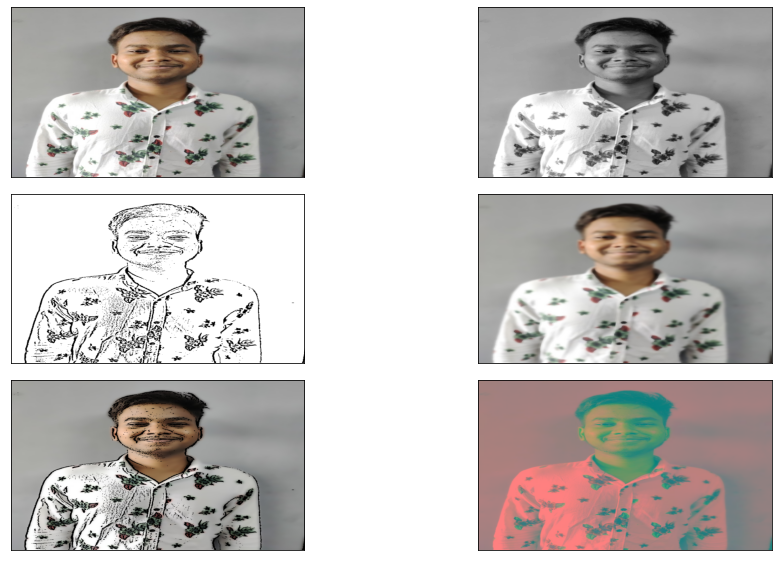

In [5]:
path = 'C:/Users/Dev Gupta/Pictures/IMG_20211004_142939.jpg'
filters(path)


In [6]:
def save(ResizedImg_6, ImagePath):
    new_name = 'Filtered_img'
    path1 = os.path.dirname(ImagePath)
    extn = os.path.splitext(ImagePath)[1]
    path = os.path.join(path1,new_name+extn)
    cv2.imwrite(path,ResizedImg_6)
    tk.messagebox.Message(f'Image saved by name {new_name} at {path}')
    print(f'Image saved by name {new_name} at {path}')

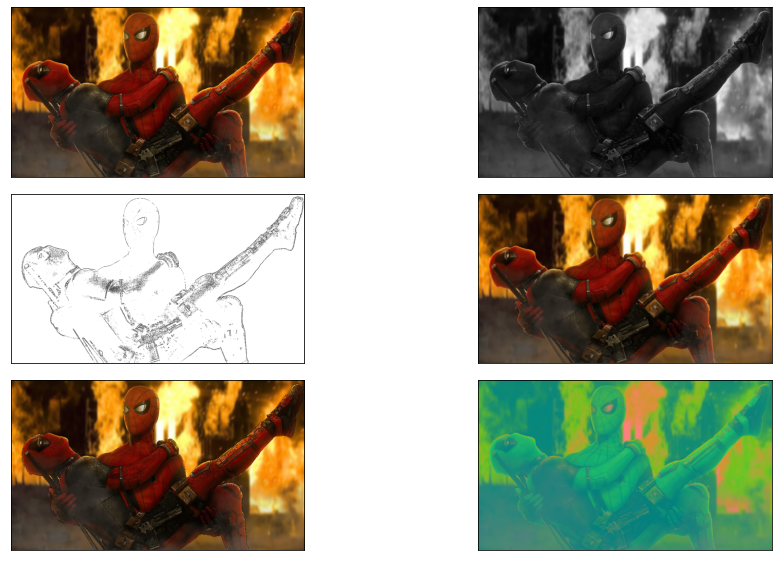

In [7]:
upload = Button(top,text='Cartoonify an Image',command=upload, padx=10,pady=5)
upload.configure(background='aqua',foreground='black',font=('calibri',10,'bold'))
upload.pack(side = TOP, pady=50)

top.mainloop()